#Lectura y procesamiento de los resultados de los mejores modelos ESN

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de ESN. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX


In [3]:
cd resultados_grilla_ESN_NARX_2STEPS

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX/resultados_grilla_ESN_NARX_2STEPS


In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsESN2S = pd.read_excel('grilla_ESN_NARX_2STEPS.xlsx', header=0)

In [5]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX


In [6]:
cd resultados_grilla_ESN_NARX_4STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX/resultados_grilla_ESN_NARX_4STEPS


In [7]:
summaryModelsESN4S = pd.read_excel('grilla_ESN_NARX_4STEPS.xlsx', header=0)


grilla_ESN_NARX_AQP = pd.concat([summaryModelsESN2S, summaryModelsESN4S], ignore_index=True)

In [8]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX


In [9]:
cd resultados_grilla_ESN_NARX_8STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX/resultados_grilla_ESN_NARX_8STEPS


In [10]:
summaryModelsESN8S = pd.read_excel('grilla_ESN_NARX_8STEPS.xlsx', header=0)



grilla_ESN_NARX_AQP = pd.concat([grilla_ESN_NARX_AQP, summaryModelsESN8S], ignore_index=True)

In [11]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX


In [12]:
cd resultados_grilla_ESN_NARX_16STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX/resultados_grilla_ESN_NARX_16STEPS


In [13]:
summaryModelsESN16S = pd.read_excel('grilla_ESN_NARX_16STEPS.xlsx', header=0)



grilla_ESN_NARX_AQP = pd.concat([grilla_ESN_NARX_AQP, summaryModelsESN16S], ignore_index=True)

In [14]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX


In [15]:
cd resultados_grilla_ESN_NARX_24STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX/resultados_grilla_ESN_NARX_24STEPS


In [16]:
summaryModelsESN24S = pd.read_excel('grilla_ESN_NARX_24STEPS.xlsx', header=0)



grilla_ESN_NARX_AQP = pd.concat([grilla_ESN_NARX_AQP, summaryModelsESN24S], ignore_index=True)

grilla_ESN_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAE                     360 non-null    float64
 1   delayedSteps            360 non-null    int64  
 2   nameModel               360 non-null    object 
 3   nameHistory             360 non-null    object 
 4   nameConfiguration       360 non-null    object 
 5   timeTrain (in seconds)  360 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.0+ KB


##La cantidad de modelos generados para el ESN NARX de AQP fue de 360

In [17]:
rslt_df = grilla_ESN_NARX_AQP.sort_values('MAE')
total = grilla_ESN_NARX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_ESN_NARX_AQP.describe()

Tiempo total: 64055.75000000001


MAE  delayedSteps  timeTrain (in seconds)
count  360.000000    360.000000              360.000000
mean     0.321184     10.800000              177.932639
std      0.024128      8.169786              173.812046
min      0.303750      2.000000               46.890000
25%      0.309602      4.000000               86.950000
50%      0.313147      8.000000              124.315000
75%      0.328649     16.000000              190.437500
max      0.487025     24.000000             1571.030000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 64055, lo que equivale a 17 horas aproximadamente. Además se tienen las estadisticas resumen.

In [20]:
rslt_df.iloc[:45,:]

MAE  ...  timeTrain (in seconds)
279  0.303750  ...                 1571.03
263  0.304009  ...                  245.34
277  0.304208  ...                  652.47
349  0.304266  ...                 1105.49
333  0.304277  ...                 1306.97
335  0.304333  ...                  965.92
261  0.304465  ...                  571.58
353  0.304507  ...                  602.80
247  0.304746  ...                  120.01
269  0.304767  ...                  249.50
243  0.305002  ...                  681.27
233  0.305004  ...                  121.33
351  0.305016  ...                 1055.55
259  0.305033  ...                  175.05
239  0.305120  ...                  119.97
209  0.305342  ...                  545.89
241  0.305400  ...                  227.55
303  0.305443  ...                  197.57
165  0.305565  ...                  145.57
281  0.305651  ...                  335.89
225  0.305690  ...                  646.91
227  0.305833  ...                  217.74
235  0.305901  ...                  252.26
245  0.306039  ...                  156.19
315  0.306198  ...                  807.51
219  0.306207  ...                   70.22
275  0.306361  ...                  375.31
229  0.306463  ...                  110.67
217  0.306618  ...                  224.98
223  0.306681  ...                  265.82
187  0.306812  ...                   98.79
345  0.306954  ...                  402.84
273  0.307048  ...                  310.26
221  0.307161  ...                   71.56
311  0.307308  ...                  215.98
307  0.307313  ...                  276.23
249  0.307329  ...                  127.37
329  0.307375  ...                  262.71
237  0.307398  ...                  102.79
295  0.307420  ...                  110.41
171  0.307453  ...                  177.30
137  0.307554  ...                  355.48
189  0.307585  ...                  316.86
207  0.307636  ...                  256.24
317  0.307687  ...                  149.98

[45 rows x 6 columns]

In [21]:
rslt_df.iloc[41,:]

MAE                                                                0.307554
delayedSteps                                                              4
nameModel                 ESN_446_1_256_sigmoid_tanh_mean_absolute_error...
nameHistory               ESN_446_1_256_sigmoid_tanh_mean_absolute_error...
nameConfiguration         ESN_446_1_256_sigmoid_tanh_mean_absolute_error...
timeTrain (in seconds)                                               355.48
Name: 137, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAE de 0.3, pero que tiene pocos retardos, especificamente 4 retardos.

In [22]:
bestModel = rslt_df.iloc[41,:]
print(bestModel)

MAE                                                                0.307554
delayedSteps                                                              4
nameModel                 ESN_446_1_256_sigmoid_tanh_mean_absolute_error...
nameHistory               ESN_446_1_256_sigmoid_tanh_mean_absolute_error...
nameConfiguration         ESN_446_1_256_sigmoid_tanh_mean_absolute_error...
timeTrain (in seconds)                                               355.48
Name: 137, dtype: object


In [23]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX


In [24]:
cd resultados_grilla_ESN_NARX_4STEPS

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX/resultados_grilla_ESN_NARX_4STEPS


In [27]:
pip install tensorflow-addons

     |████████████████████████████████| 706kB 10.3MB/s 


In [28]:
import tensorflow_addons as tfa

In [30]:
#para recuperar history
history=np.load(bestModel['nameHistory'],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'])
print(saved_model.summary())
#print(saved_model.layers[2].get_config())

{'loss': [0.29377639293670654, 0.2808931767940521, 0.2792718708515167, 0.2788683772087097, 0.2779029905796051, 0.2775670886039734, 0.2782955765724182, 0.27816885709762573, 0.27858102321624756, 0.2780568599700928, 0.2773839831352234, 0.2762607932090759, 0.27918940782546997, 0.2780115306377411, 0.2774057686328888, 0.27711036801338196, 0.27749431133270264, 0.2774229943752289, 0.2776249349117279, 0.2763047218322754, 0.2776266038417816, 0.2765524089336395, 0.2780490815639496, 0.2774490714073181, 0.2760385572910309, 0.27832478284835815, 0.27892398834228516, 0.27798038721084595, 0.27581122517585754, 0.276582807302475, 0.278012216091156, 0.2777678370475769, 0.2767495810985565, 0.27690449357032776, 0.27805858850479126, 0.2763393223285675, 0.2757705748081207, 0.2767350375652313, 0.27651605010032654, 0.27641063928604126, 0.27720963954925537, 0.27759212255477905, 0.2772739827632904, 0.27681511640548706, 0.27675262093544006, 0.27627187967300415, 0.27828502655029297, 0.2761616110801697, 0.2772507369

In [31]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX/resultados_grilla_ESN_NARX


In [32]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/resultados_grillas_AQP_NARX


In [33]:
cd ..

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos


In [34]:
cd Data_AQP

/content/gdrive/My Drive/Universidad/2020/Tesis_final/Codigos/Data_AQP


In [35]:
def cargarData1():
  trainDFScaled = pd.read_csv('trainScaledDF.csv', header=0)
  testDFScaled = pd.read_csv('testScaledDF.csv', header=0)
  trainDF = pd.read_csv('trainDF.csv', header=0)
  testDF = pd.read_csv('testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 45):
  cont = 0
  X = list()
  y = list()

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  for chunk_id in chunk_ids:
    rows = data.loc[(data['chunkID'] == chunk_id)]
    #print(rows)
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    for _, row in rows.iterrows():
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        salidaAux = rows.iloc[indexTarget, columnTarget]
        xAux = rows.iloc[indexAux:end_row, :].values
        #print(xAux.shape)
        #print(xAux)
        X.append(xAux)
        y.append(salidaAux)
        #print(salidaAux)
      indexAux = indexAux + 1
    cont = cont + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY

def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()

def reshapeXdata(trainXScaled, testXScaled):
  #reshape data
  trainXScaled = trainXScaled.reshape((trainXScaled.shape[0],trainXScaled.shape[1]*trainXScaled.shape[2]))
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  testXScaled = testXScaled.reshape((testXScaled.shape[0],testXScaled.shape[1]*testXScaled.shape[2]))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  return trainXScaled, testXScaled

# calculate the error between an actual and predicted value
def calculate_error(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)

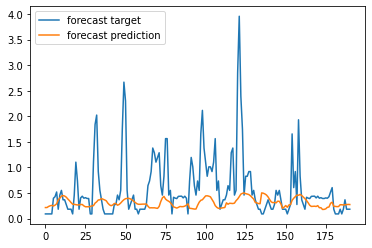

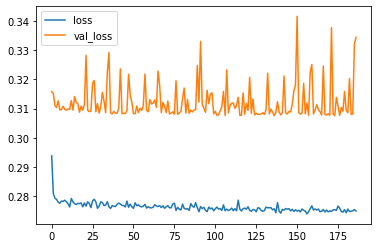

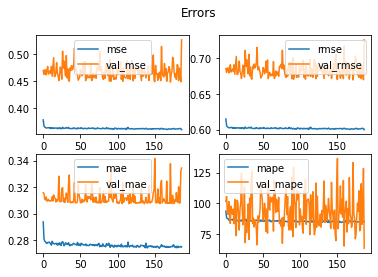

In [36]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 24, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:191]
validation_predictions = saved_model.predict(testXScaled[:191,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)

##Generar data para NARMAX

In [37]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 45):
  cont = 0
  X = list()
  y = list()
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  #Se va a iterar para cada fragmento de datos
  values = data.values
  chunk_ids = np.unique(values[:, 0])
  valuesScaled = dataScaled.values
  chunk_idsS = np.unique(valuesScaled[:, 0])

  for i in range(chunk_ids.shape[0]):
    #if cont == 1:
      #break
    rows = data.loc[(data['chunkID'] == chunk_ids[i])]
    rowsScaled = dataScaled.loc[(dataScaled['chunkID'] == chunk_idsS[i])]
    cantidadFilas = rows.shape[0]
    indexAux = 0
    indexTarget = 0
    contInterno = 0
    for _, row in rows.iterrows():
      #if contInterno == 1:
        #break
      end_row = indexAux + delays
      indexTarget = end_row - 1 + predictionHorizon
      if indexTarget <= cantidadFilas-1:
        #Se agrega la salida esperada sin escalar
        salidaAux = rows.iloc[indexTarget, columnTarget]
        #y.append(salidaAux)
        xAux = rowsScaled.iloc[indexAux:end_row, :].values
        xAux = xAux.reshape(1,xAux.shape[0],xAux.shape[1])
        #print(type(xAux))
        #print(xAux.shape)
        #print(xAux)
        #X.append(xAux)
        prediction = float(saved_model.predict(xAux))
        #print(type(prediction))
        #print(type(salidaAux))
        error = calculate_error(salidaAux, prediction)
        posicionS = rowsScaled.iloc[indexTarget, 1]
        posicion = rows.iloc[indexTarget, 1]
        #print("Posicion: " + str(posicion))
        #print("Prediction: " + str(prediction))
        #print("salidaAux: " + str(salidaAux))
        #print("Error: " + str(error))
        dataNarmaxScaled.loc[(dataNarmaxScaled['chunkID'] == chunk_idsS[i]) & (dataNarmaxScaled['position_within_chunk'] == posicionS), 'error'] = error
        dataNarmax.loc[(dataNarmax['chunkID'] == chunk_ids[i]) & (dataNarmax['position_within_chunk'] == posicion), 'error'] = error
      contInterno = contInterno + 1  
      indexAux = indexAux + 1
    cont = cont + 1
  
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled


In [38]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 24, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 24, saved_model)

In [39]:
dataTrainNarmax.to_csv('dataTrainNarmaxESN.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledESN.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxESN.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledESN.csv', index = False)

In [40]:
dataTrainNarmax.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
27      1.0                   28.0       0.092022  0.140026
28      1.0                   29.0       0.092022  0.114611
29      1.0                   30.0       0.092022  0.159409
30      1.0                   31.0       0.092022  0.198449
31      1.0                   32.0       0.092022  0.202427
32      1.0                   33.0       0.092022  0.180412
33      1.0                   34.0       0.184045  0.056770
34      1.0                   35.0       0.276067  0.004734
35      1.0                   36.0       0.606164  0.222231
36      1.0                   37.0       0.663358  0.241281
37      1.0                   38.0       0.644848  0.190655
38      1.0                   39.0       1.104268  0.633447
39      1.0                   40.0       0.736179  0.268172
40      1.0                   41.0       0.184045  0.263053
41      1.0                   42.0       0.092022  0.333449
42      1.0                   43.0       0.092022  0.291218
43      1.0                   44.0       0.552134  0.228604
44      1.0                   45.0       0.920223  0.641989
45      1.0                   46.0       0.552134  0.280205
46      1.0                   47.0       0.276067  0.004997
47      1.0                   48.0       0.092022  0.184566
48      1.0                   49.0       0.439351  0.165826
49      1.0                   50.0       0.092022  0.185230
50      1.0                   51.0       0.092022  0.187069
51      1.0                   52.0       0.184045  0.109975
52      1.0                   53.0       0.092022  0.192191
53      1.0                   54.0       0.092022  0.200888
54      1.0                   55.0       0.092022  0.220284
55      1.0                   56.0       0.092022  0.211573
56      1.0                   57.0       0.184045  0.116714
57      1.0                   58.0       0.920223  0.624835
58      1.0                   59.0       0.736179  0.369222
59      1.0                   60.0       1.196290  0.779868
60      1.0                   61.0       1.748424  1.287548
61      1.0                   62.0       3.496849  3.007135
62      1.0                   63.0       2.024491  1.516630
63      1.0                   64.0       1.104268  0.604903
64      1.0                   65.0       0.736179  0.274908
65      1.0                   66.0       0.828201  0.407865
66      1.0                   67.0       0.368089  0.021785
67      1.0                   68.0       0.368089  0.000609
68      1.0                   69.0       0.184045  0.156585
69      1.0                   70.0       0.184045  0.148676
70      1.0                   71.0       0.184045  0.139110
71      1.0                   72.0       0.184045  0.131016
72      1.0                   73.0       0.368089  0.055407
73      1.0                   74.0       0.368089  0.058667
74      1.0                   75.0       0.368089  0.064559
75      1.0                   76.0       0.276067  0.031019
76      1.0                   77.0       0.184045  0.058288

In [41]:
dataTestNarmax.iloc[:50,[0,1,45,46]]

chunkID  position_within_chunk  target_4_1601     error
27       1.0                  148.0       0.092022  0.124263
28       1.0                  149.0       0.092022  0.125083
29       1.0                  150.0       0.092022  0.146438
30       1.0                  151.0       0.092022  0.159347
31       1.0                  152.0       0.092022  0.167372
32       1.0                  153.0       0.398325  0.151603
33       1.0                  154.0       0.428488  0.165231
34       1.0                  155.0       0.520786  0.231157
35       1.0                  156.0       0.184045  0.182286
36       1.0                  157.0       0.460112  0.056609
37       1.0                  158.0       0.552134  0.113120
38       1.0                  159.0       0.368089  0.083413
39       1.0                  160.0       0.368089  0.073371
40       1.0                  161.0       0.276067  0.143370
41       1.0                  162.0       0.184045  0.199275
42       1.0                  163.0       0.184045  0.167963
43       1.0                  164.0       0.184045  0.130335
44       1.0                  165.0       0.092022  0.189655
45       1.0                  166.0       0.460112  0.181028
46       1.0                  167.0       1.104268  0.830410
47       1.0                  168.0       0.736179  0.469153
48       1.0                  169.0       0.184045  0.085518
49       1.0                  170.0       0.405162  0.129587
50       1.0                  171.0       0.438234  0.161595
51       1.0                  172.0       0.399484  0.150445
52       1.0                  173.0       0.409662  0.177855
53       1.0                  174.0       0.393647  0.161578
54       1.0                  175.0       0.393286  0.161241
55       1.0                  176.0       0.092022  0.145117
56       1.0                  177.0       0.092022  0.157447
57       1.0                  178.0       1.104268  0.850927
58       1.0                  179.0       1.840447  1.536916
59       1.0                  180.0       2.024491  1.696264
60       1.0                  181.0       0.920223  0.555187
61       1.0                  182.0       0.552134  0.184512
62       1.0                  183.0       0.368089  0.023949
63       1.0                  184.0       0.184045  0.194259
64       1.0                  185.0       0.092022  0.273291
65       1.0                  186.0       0.092022  0.255635
66       1.0                  187.0       0.092022  0.209214
67       1.0                  188.0       0.092022  0.176804
68       1.0                  189.0       0.092022  0.160576
69       1.0                  190.0       0.092022  0.174498
70       1.0                  191.0       0.276067  0.019191
71       1.0                  192.0       0.276067  0.019093
99       2.0                  148.0       0.460112  0.198199
100      2.0                  149.0       0.368089  0.091684
101      2.0                  150.0       0.552134  0.246752
102      2.0                  151.0       1.748424  1.407642
103      2.0                  152.0       2.668648  2.298495

In [42]:
print("trainDFScaled.shape = " + str(trainDFScaled.shape))
print("trainDF.shape = " + str(trainDF.shape))
print("testDFScaled.shape = " + str(testDFScaled.shape))
print("testDF.shape = " + str(testDF.shape))
#print("trainXScaled.shape = " + str(trainXScaled.shape))
#print("trainY.shape = " + str(trainY.shape))

trainDFScaled.shape = (24600, 46)
trainDF.shape = (24600, 46)
testDFScaled.shape = (14760, 46)
testDF.shape = (14760, 46)


In [43]:
print("dataTrainNarmax.shape = " + str(dataTrainNarmax.shape))
print("dataTrainNarmaxScaled.shape = " + str(dataTrainNarmaxScaled.shape))
print("dataTestNarmax.shape = " + str(dataTestNarmax.shape))
print("dataTestNarmaxScaled.shape = " + str(dataTestNarmaxScaled.shape))

dataTrainNarmax.shape = (19065, 47)
dataTrainNarmaxScaled.shape = (19065, 47)
dataTestNarmax.shape = (9225, 47)
dataTestNarmaxScaled.shape = (9225, 47)
